In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
from sklearn import *
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

loc = 'workstation'
if loc == 'workstation':
    wd = 'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
    # sys.path.insert(0, op.join(wd, 'analysis', 'tools'))
elif loc == 'laptop':
    wd = '/Users/sammichekroud/Desktop/postdoc/tuningcurves'
sys.path.insert(0, op.join(wd, 'analysis', 'tools'))
os.chdir(wd)
from funcs import getSubjectInfo
from TuningCurveFuncs import makeTuningCurve, getTuningCurve_FullSpace, createFeatureBins, visualise_FeatureBins

os.chdir(wd)
subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26])
#1,2,3,10,19 all have only 1 session. 23 something wrong in the second session, completely unusable eeg data due to serious noise
nsubs = subs.size

times = np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy'))
ntimes = times.size
nitems = 2 #two items are presented in the array, we 'decode' both

loading in 20 participants
binwidth = 10
done loading
binwidth = 15
done loading
binwidth = 22
done loading


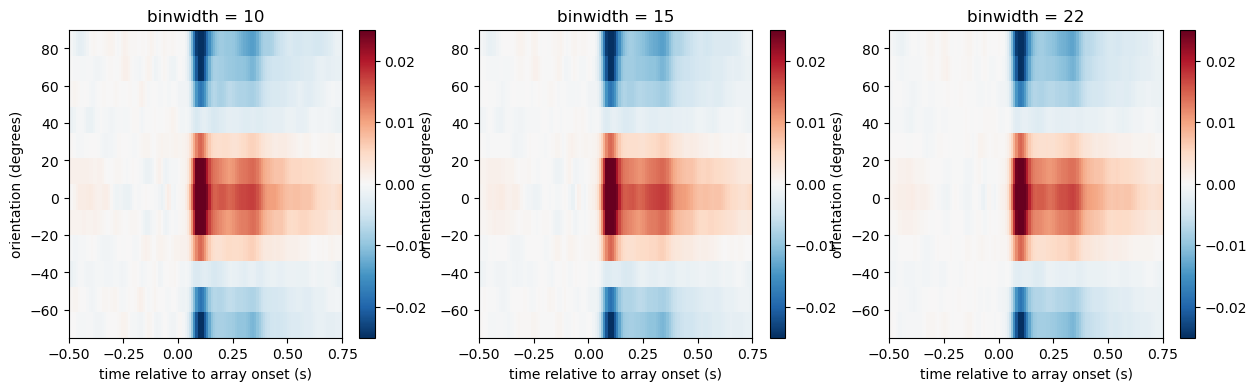

In [2]:
weightTrials = True

fig = plt.figure(figsize = [15, 4])
print(f'loading in {subs.size} participants')
binstep = 4
binstep = 15 #all using the same binstep
plotcount = 0
#for binwidth in [11, 16, 22]:
for binwidth in [10, 15, 22]:
    plotcount += 1
    nbins, binmids, binstarts, binends = createFeatureBins(binstep = binstep, binwidth = binwidth,
                                                           feature_start = -90+binstep, feature_end = 90)
    alldata = np.zeros(shape = [subs.size, nitems, binmids.size, ntimes]) * np.nan #2 because 2 items decoded
    print(f'binwidth = {binwidth}')
    subcount = -1
    for i in subs:
        subcount +=1
        #print(f'working on ppt {subcount+1}/{subs.size}')
        
        #read in single subject data
        data = np.load(op.join(wd, 'data', 'tuningcurves', f's{i}_TuningCurve_mahaldists_binstep{binstep}_binwidth{binwidth}_weightTrials{weightTrials}.npy'))
        bdata = pd.read_csv(op.join(wd, 'data', 'tuningcurves', f's{i}_TuningCurve_metadata.csv'))
        [nitems, ntrials, nbins, ntimes] = data.shape
        data = data * -1 #invert this, so more positive (larger) values = closer (mahalnobis distances are small when test is close to train)
        
        meandata = np.nanmean(data, axis=1)
        alldata[subcount] = meandata
        
    print('done loading')
    
    #for each participant and decoded item, demean across bins at each time point
    gmean_tp = alldata.copy()
    for isub in range(nsubs):
        for iitem in range(nitems):
            for tp in range(ntimes):
                gmean_tp[isub, iitem, :, tp] = np.subtract(gmean_tp[isub, iitem, :, tp], gmean_tp[isub, iitem, :, tp].mean())
    
    gmean_ave = gmean_tp.mean(axis=1) #average across items
    gmean_ave = gmean_ave.mean(0) #average across participants now

    vlims = 0.025
    
    ax = fig.add_subplot(1,3,plotcount)
    plot = ax.imshow(gmean_ave, aspect='auto', origin = 'lower', cmap = 'RdBu_r', interpolation= 'none',
                     vmin = -vlims, vmax = vlims,
             extent = [times.min(), times.max(), binmids.min(), binmids.max()])
    fig.colorbar(plot)
    ax.set_ylabel(f'orientation (degrees)');
    ax.set_xlabel(f'time relative to array onset (s)');
    ax.set_title(f'binwidth = {binwidth}')
    ax.set_xlim([-0.5,0.75]);

loading in 20 participants
done loading
done loading
done loading


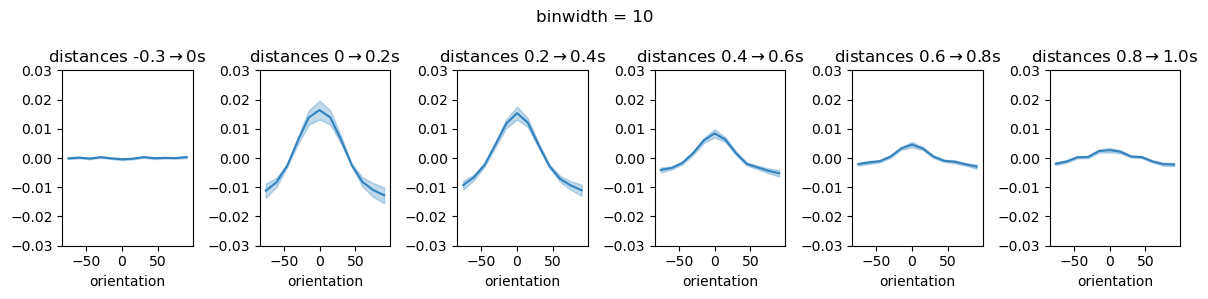

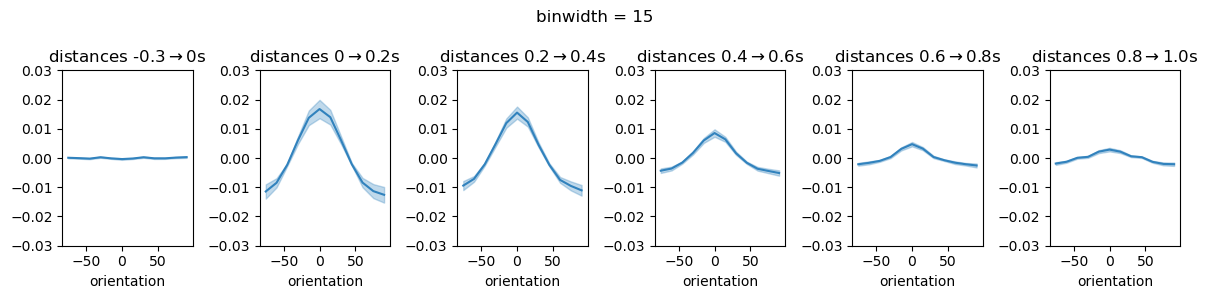

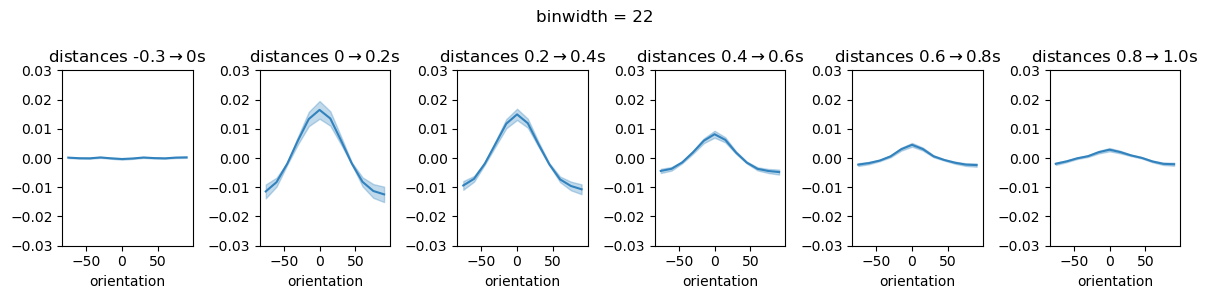

In [3]:
tstarts = [-0.3, 0,   0.2, 0.4, 0.6, 0.8]
tends   = [ 0,   0.2, 0.4, 0.6, 0.8, 1.0]
#plotcount = np.arange(len(tstarts)*3)+1

#bigfig = plt.figure(figsize = [15, 9])
#figs = bigfig.subfigures(nrows=3, ncols=1)

print(f'loading in {subs.size} participants')
binstep = 4 #all using the same binstep
binstep = 15
#plotcount = 1
widthcount = -1
#for binwidth in [11, 16, 22]:
for binwidth in [10,15, 22]:
    #widthcount +=1
    nbins, binmids, binstarts, binends = createFeatureBins(binstep = binstep, binwidth = binwidth,
                                                           feature_start = -90+binstep, feature_end = 90)
    alldata = np.zeros(shape = [subs.size, nitems, binmids.size, ntimes]) * np.nan #2 because 2 items decoded
    subcount = -1
    for i in subs:
        subcount +=1
        #print(f'working on ppt {subcount+1}/{subs.size}')
        
        #read in single subject data
        data = np.load(op.join(wd, 'data', 'tuningcurves', f's{i}_TuningCurve_mahaldists_binstep{binstep}_binwidth{binwidth}_weightTrials{weightTrials}.npy'))
        bdata = pd.read_csv(op.join(wd, 'data', 'tuningcurves', f's{i}_TuningCurve_metadata.csv'))
        [nitems, ntrials, nbins, ntimes] = data.shape
        
        data = data * -1 #invert this, so more positive (larger) values = closer (mahalnobis distances are small when test is close to train)
        
        meandata = np.nanmean(data, axis=1)
        alldata[subcount] = meandata
        
    print('done loading')
    
    #for each participant and decoded item, demean across bins at each time point
    gmean_tp = alldata.copy()
    for isub in range(nsubs):
        for iitem in range(nitems):
            for tp in range(ntimes):
                gmean_tp[isub, iitem, :, tp] = np.subtract(gmean_tp[isub, iitem, :, tp], gmean_tp[isub, iitem, :, tp].mean())
    
    gmean_ave = gmean_tp.mean(axis=1) #average across items
    gmean_ave = gmean_ave.mean(0) #average across participants now
    #fig = figs[widthcount]
    fig = plt.figure(figsize = [12, 3])
    plotcount=1
    for y in range(len(tstarts)):
        x = [tstarts[y], tends[y]]
        ax = fig.add_subplot(1,6,plotcount)
        tinds = np.logical_and(np.greater_equal(times, x[0]), np.less_equal(times, x[1]))
        tmpdat = gmean_tp[:,:,:,tinds].copy() # ppts x items x bins x time
        tmpdat = tmpdat.mean(axis=3) #average across time, now ppts x items x bins
        tmpdat = tmpdat.mean(axis=1) #average across items, now ppts x bins
        imean = tmpdat.mean(0)
        isem  = sp.stats.sem(tmpdat, axis=0, ddof=0, nan_policy='omit')
        ax.plot(binmids, imean, lw = 1.5, color = '#3182bd')
        ax.fill_between(binmids, np.add(imean, isem), np.subtract(imean, isem), edgecolor=None, alpha = 0.3, color='#3182bd')
        ax.set_xlabel('orientation')
        ax.set_title(f'distances {x[0]}$\\rightarrow${x[1]}s')
        ax.set_ylim([-0.03, 0.03])
        plotcount += 1
    fig.suptitle(f'binwidth = {binwidth}')
    fig.tight_layout()
#bigfig.tight_layout()
